In [141]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
# from torchmetrics import MultiScaleStructuralSimilarityIndexMeasure #StructuralSimilarityIndexMeasure
# MSSIM = MultiScaleStructuralSimilarityIndexMeasure()
# from torchmetrics import SignalDistortionRatio
# PSNR = SignalDistortionRatio()
# from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity
# LPIPS = LearnedPerceptualImagePatchSimilarity(net_type='vgg', normalize=True)

import torch.nn.functional as F


In [15]:
import SimpleITK as sitk

def convert_mha_to_nii(mha_file_path, nii_file_path):
    # Read the .mha file
    image = sitk.ReadImage(mha_file_path)

    # Write the image as a .nii file
    sitk.WriteImage(image, nii_file_path, True)  # The 'True' parameter here enables compression

# Example usage
mha_file_path = '/Users/youngwoojung/Documents/Research_Internship/SEResUnet/VSD.Brain.XX.O.MR_T1.878.mha'
nii_file_path = '/Users/youngwoojung/Documents/Research_Internship/SEResUnet/VSD.Brain.XX.O.MR_T1.878.nii'
convert_mha_to_nii(mha_file_path, nii_file_path)


In [142]:
#diffGAN
pred = np.load('./3rd_yr/diffusion.py/result/real_results/Unet_volume118528_inf.npy')
#SEResUnet_GAN_original
pred2 = np.load('./3rd_yr/diffusion.py/result/real_results/ResUnet_volume118528_inf.npy')
pred3 = np.load('./3rd_yr/diffusion.py/result/real_results/baseGan_volume118528_inf.npy')
pred4 = np.load('./3rd_yr/diffusion.py/result/real_results/diffGan_volume118528_inf.npy')
# pred = np.load('./3rd_yr/diffusion.py/result/real_results/baseGan_volume118528_ds10_inf.npy')
# #SEResUnet_GAN_original
# pred2 = np.load('./3rd_yr/diffusion.py/result/real_results/diffGan_volume118528_ds10_inf.npy')
# pred3 = np.load('./3rd_yr/diffusion.py/result/real_results/baseGan_volume118528_ds20_inf.npy')
# pred4 = np.load('./3rd_yr/diffusion.py/result/real_results/diffGan_volume118528_ds20_inf.npy')
gt = np.load('./3rd_yr/diffusion.py/result/real_results/baseGan_volume118528_gt.npy')
lr = np.load('./3rd_yr/diffusion.py/result/real_results/baseGan_volume118528_lr.npy')

# pred = pred[40:200,40:200,40:200]
# gt = gt[40:200,40:200,40:200]
# print(pred.shape)

In [4]:
print(pred4.shape)

(240, 240, 240)


In [ ]:
# idx = 100
# lr_sample = torch.tensor(lr[:,idx,:])
# pred_sample = torch.tensor(pred[:,idx,:])

# lr_sample = (lr_sample - lr_sample.min())/ (lr_sample.max() - lr_sample.min())
# pred_sample = (pred_sample - pred_sample.min())/ (pred_sample.max() - pred_sample.min())

# plt.imshow(np.rot90(lr_sample), cmap='gray', vmin=0, vmax=1)
# plt.title("LR")
# plt.show()

# plt.imshow(np.rot90(pred_sample), cmap='gray', vmin=0, vmax=1)
# plt.title("Pred")
# plt.show()

In [24]:
m = SEResUnet()
#count number of parameters
pytorch_total_params = sum(p.numel() for p in m.parameters())
print("Total number of parameters: ", pytorch_total_params)

Total number of parameters:  109552769


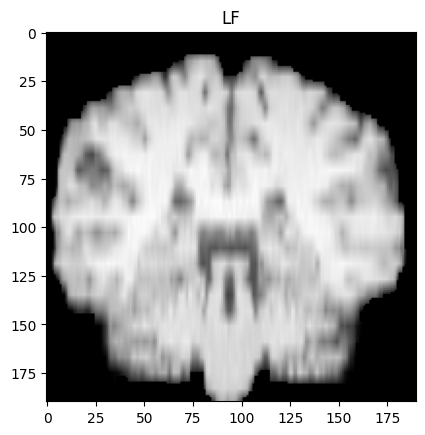

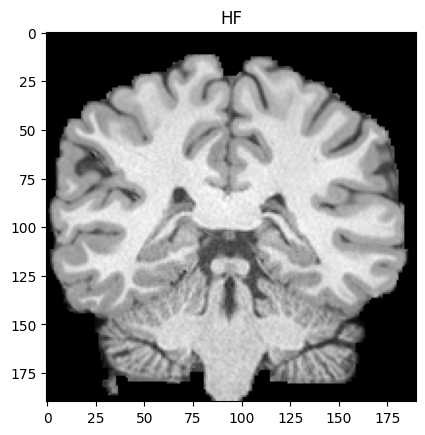

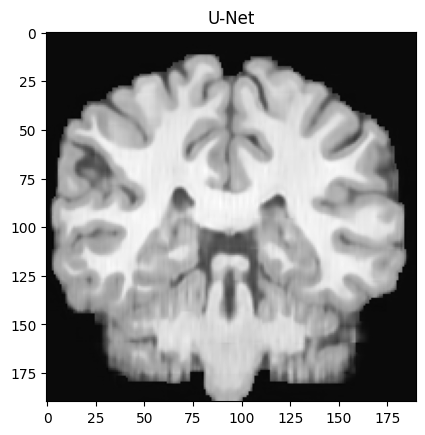

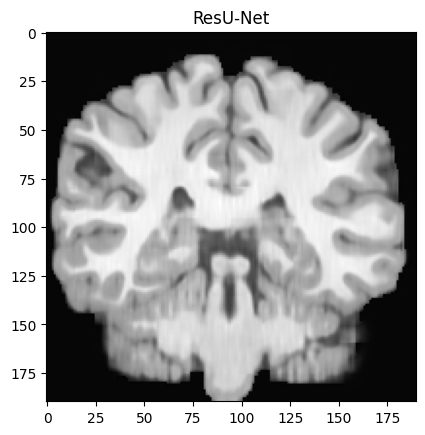

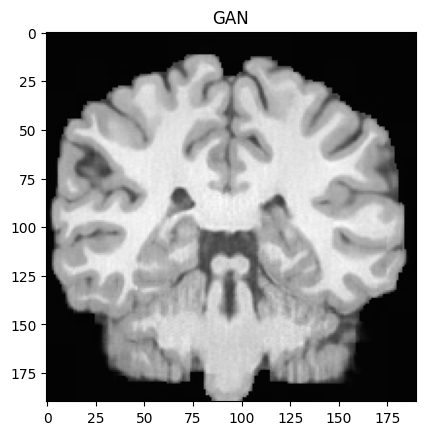

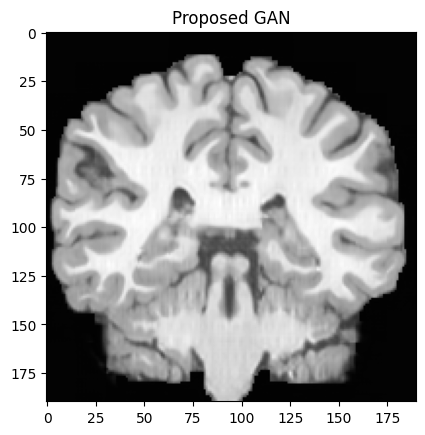

In [174]:
import cv2 as cv
idx = 97

lr_sample = torch.tensor(lr[:,idx,:])
hr_sample = torch.tensor(gt[:,idx,:])
#diffGAN
pred_sample = torch.tensor(pred[:,idx,:])
#baseGAN
pred2_sample = torch.tensor(pred2[:,idx,:])
#subVolGAN
pred3_sample = torch.tensor(pred3[:,idx,:])
pred4_sample = torch.tensor(pred4[:,idx,:])

lr_sample = (lr_sample - lr_sample.min())/ (lr_sample.max() - lr_sample.min())
hr_sample = (hr_sample - hr_sample.min())/ (hr_sample.max() - hr_sample.min())
pred_sample = (pred_sample - pred_sample.min())/ (pred_sample.max() - pred_sample.min())
pred2_sample = (pred2_sample - pred2_sample.min())/ (pred2_sample.max() - pred2_sample.min())
pred3_sample = (pred3_sample - pred3_sample.min())/ (pred3_sample.max() - pred3_sample.min())
pred4_sample = (pred4_sample - pred4_sample.min())/ (pred4_sample.max() - pred4_sample.min())


#crop lr_sample
lr_sample = lr_sample[25:215,10:200]
hr_sample = hr_sample[25:215,10:200]
pred_sample = pred_sample[25:215,10:200]
pred2_sample = pred2_sample[25:215,10:200]
pred3_sample = pred3_sample[25:215,10:200]
pred4_sample = pred4_sample[25:215,10:200]



plt.imshow(np.rot90(lr_sample), cmap='gray', vmin=0, vmax=1)
plt.title("LF")
plt.grid(False)
plt.show()

plt.imshow(np.rot90(hr_sample), cmap='gray', vmin=0, vmax=1)
plt.title("HF")
plt.grid(False)
plt.show()

plt.imshow(np.rot90(pred_sample), cmap='gray', vmin=0, vmax=1)
plt.title("U-Net")
plt.show()

plt.imshow(np.rot90(pred2_sample), cmap='gray', vmin=0, vmax=1)
plt.title("ResU-Net")
plt.show()
plt.imshow(np.rot90(pred3_sample), cmap='gray', vmin=0, vmax=1)
plt.title("GAN")
plt.show()
plt.imshow(np.rot90(pred4_sample), cmap='gray', vmin=0, vmax=1)
plt.title("Proposed GAN")
plt.grid(False)
plt.show()

# #plot all in one line
# fig, ax = plt.subplots(1,6, figsize=(20, 10))

# ax[0].imshow(np.rot90(lr_sample), cmap='gray', vmin=0, vmax=1)
# ax[0].set_title('LF')
# ax[1].imshow(np.rot90(hr_sample), cmap='gray', vmin=0, vmax=1)
# ax[1].set_title('HF')
# ax[2].imshow(np.rot90(pred_sample), cmap='gray', vmin=0, vmax=1)
# ax[2].set_title('U-Net')
# ax[3].imshow(np.rot90(pred2_sample), cmap='gray', vmin=0, vmax=1)
# ax[3].set_title('ResU-Net')
# ax[4].imshow(np.rot90(pred3_sample), cmap='gray', vmin=0, vmax=1)
# ax[4].set_title('GAN')
# ax[5].imshow(np.rot90(pred4_sample), cmap='gray', vmin=0, vmax=1)
# ax[5].set_title('Proposed GAN')
# #axis off
# for a in ax:
#     a.axis('off')
# plt.show()



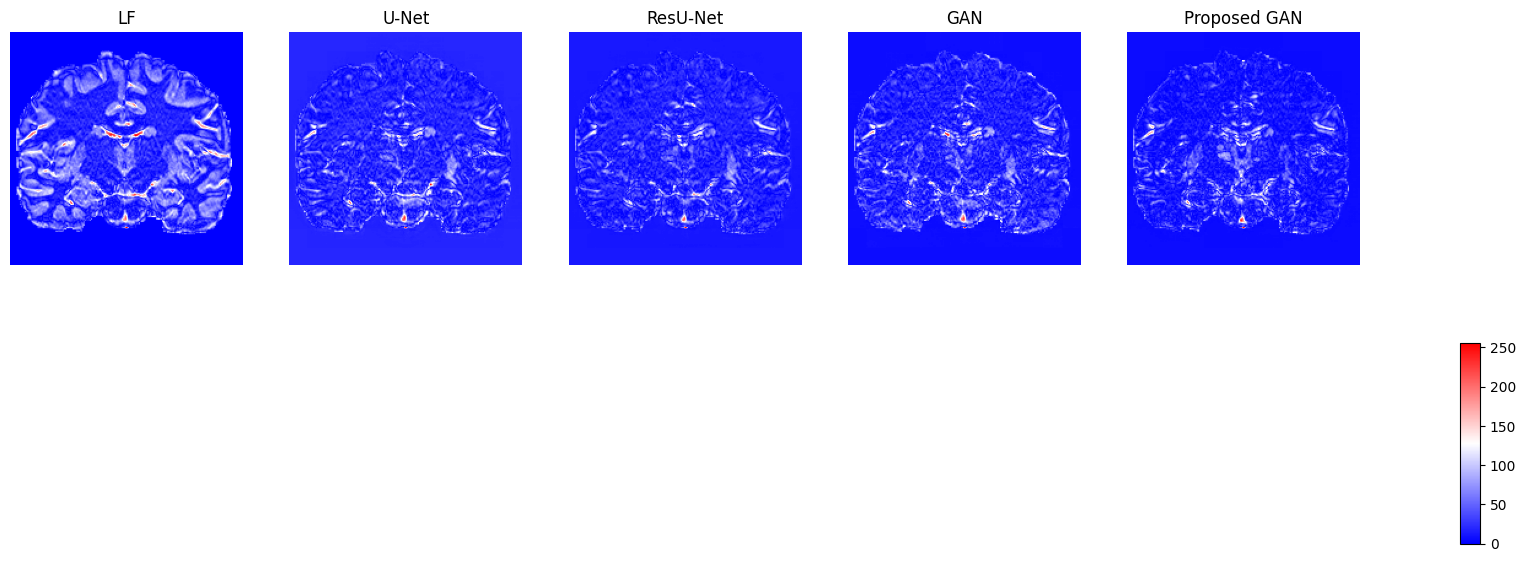

In [129]:
# make me a pixel-wise error map between the ground truth and the prediction
import cv2
import numpy as np

idx = 130

lr_sample = torch.tensor(lr[:,idx,:])
hr_sample = torch.tensor(gt[:,idx,:])
#diffGAN
pred_sample = torch.tensor(pred[:,idx,:])
#baseGAN
pred2_sample = torch.tensor(pred2[:,idx,:])
#subVolGAN
pred3_sample = torch.tensor(pred3[:,idx,:])
pred4_sample = torch.tensor(pred4[:,idx,:])

lr_sample = (lr_sample - lr_sample.min())/ (lr_sample.max() - lr_sample.min())
hr_sample = (hr_sample - hr_sample.min())/ (hr_sample.max() - hr_sample.min())
pred_sample = (pred_sample - pred_sample.min())/ (pred_sample.max() - pred_sample.min())
pred2_sample = (pred2_sample - pred2_sample.min())/ (pred2_sample.max() - pred2_sample.min())
pred3_sample = (pred3_sample - pred3_sample.min())/ (pred3_sample.max() - pred3_sample.min())
pred4_sample = (pred4_sample - pred4_sample.min())/ (pred4_sample.max() - pred4_sample.min())


#crop lr_sample
lr_sample = lr_sample[25:215,10:200]
hr_sample = hr_sample[25:215,10:200]
pred_sample = pred_sample[25:215,10:200]
pred2_sample = pred2_sample[25:215,10:200]
pred3_sample = pred3_sample[25:215,10:200]
pred4_sample = pred4_sample[25:215,10:200]

# Convert PyTorch tensors to numpy arrays
lr_sample_np = lr_sample.numpy()
pred_sample_np = pred_sample.numpy()
pred2_sample_np = pred2_sample.numpy()
pred3_sample_np = pred3_sample.numpy()
pred4_sample_np = pred4_sample.numpy()
hr_sample_np = hr_sample.numpy()

# Calculate error map
error_map = np.abs(lr_sample_np - hr_sample_np)
error_map_normalized = ((error_map - error_map.min()) * (255 / (error_map.max() - error_map.min()))).astype(np.uint8)

error_map2 = np.abs(pred_sample_np - hr_sample_np)
error_map2_normalized = ((error_map2 - error_map2.min()) * (255 / (error_map2.max() - error_map2.min()))).astype(np.uint8)

error_map3 = np.abs(pred2_sample_np - hr_sample_np)
error_map3_normalized = ((error_map3 - error_map3.min()) * (255 / (error_map3.max() - error_map3.min()))).astype(np.uint8)

error_map4 = np.abs(pred3_sample_np - hr_sample_np)
error_map4_normalized = ((error_map4 - error_map4.min()) * (255 / (error_map4.max() - error_map4.min()))).astype(np.uint8)

error_map5 = np.abs(pred4_sample_np - hr_sample_np)
error_map5_normalized = ((error_map5 - error_map5.min()) * (255 / (error_map5.max() - error_map5.min()))).astype(np.uint8)


# # Set up a figure and axes for subplots

# plt.figure(figsize=(20, 10))  # You can adjust the figure size as needed

# # First subplot
# plt.subplot(1, 4, 1)  # 1 row, 4 columns, first plot
# plt.axis('off')
# plt.imshow(np.rot90(error_map_normalized), cmap='bwr', vmin=0, vmax=255)

# # Second subplot
# plt.subplot(1, 4, 2)  # 1 row, 4 columns, second plot
# plt.axis('off')
# plt.imshow(np.rot90(error_map3_normalized), cmap='bwr', vmin=0, vmax=255)

# # Third subplot
# plt.subplot(1, 4, 3)  # 1 row, 4 columns, third plot
# plt.axis('off')
# plt.imshow(np.rot90(error_map4_normalized), cmap='bwr', vmin=0, vmax=255)

# # Fourth subplot
# plt.subplot(1, 4, 4)  # 1 row, 4 columns, fourth plot
# plt.axis('off')
# plt.imshow(np.rot90(error_map5_normalized), cmap='bwr', vmin=0, vmax=255)

# # Show all plots
# plt.show()

# plot all in one line with same index
# idx are 90, 100, 110, 120, 130
fig, ax = plt.subplots(1,5, figsize=(20, 10))

ax[0].imshow(np.rot90(error_map_normalized), cmap='bwr', vmin=0, vmax=255)
ax[0].set_title('LF')
ax[1].imshow(np.rot90(error_map2_normalized), cmap='bwr', vmin=0, vmax=255)
ax[1].set_title('U-Net')
ax[2].imshow(np.rot90(error_map3_normalized), cmap='bwr', vmin=0, vmax=255)
ax[2].set_title('ResU-Net')
ax[3].imshow(np.rot90(error_map4_normalized), cmap='bwr', vmin=0, vmax=255)
ax[3].set_title('GAN')
ax[4].imshow(np.rot90(error_map5_normalized), cmap='bwr', vmin=0, vmax=255)
ax[4].set_title('Proposed GAN')
#axis off
for a in ax:
    a.axis('off')

#add color bar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.01, 0.2])
fig.colorbar(ax[0].imshow(np.rot90(error_map_normalized), cmap='bwr', vmin=0, vmax=255), cax=cbar_ax)

plt.show()







# fig, ax = plt.subplots()

# data = np.clip(data, -1, 1)

# cax = ax.imshow(data, cmap='afmhot')
# ax.set_title('Gaussian noise with horizontal colorbar')

# # Add colorbar and adjust ticks afterwards
# cbar = fig.colorbar(cax, orientation='horizontal')
# cbar.set_ticks(ticks=[-1, 0, 1], labels=['Low', 'Medium', 'High'])

# plt.show()

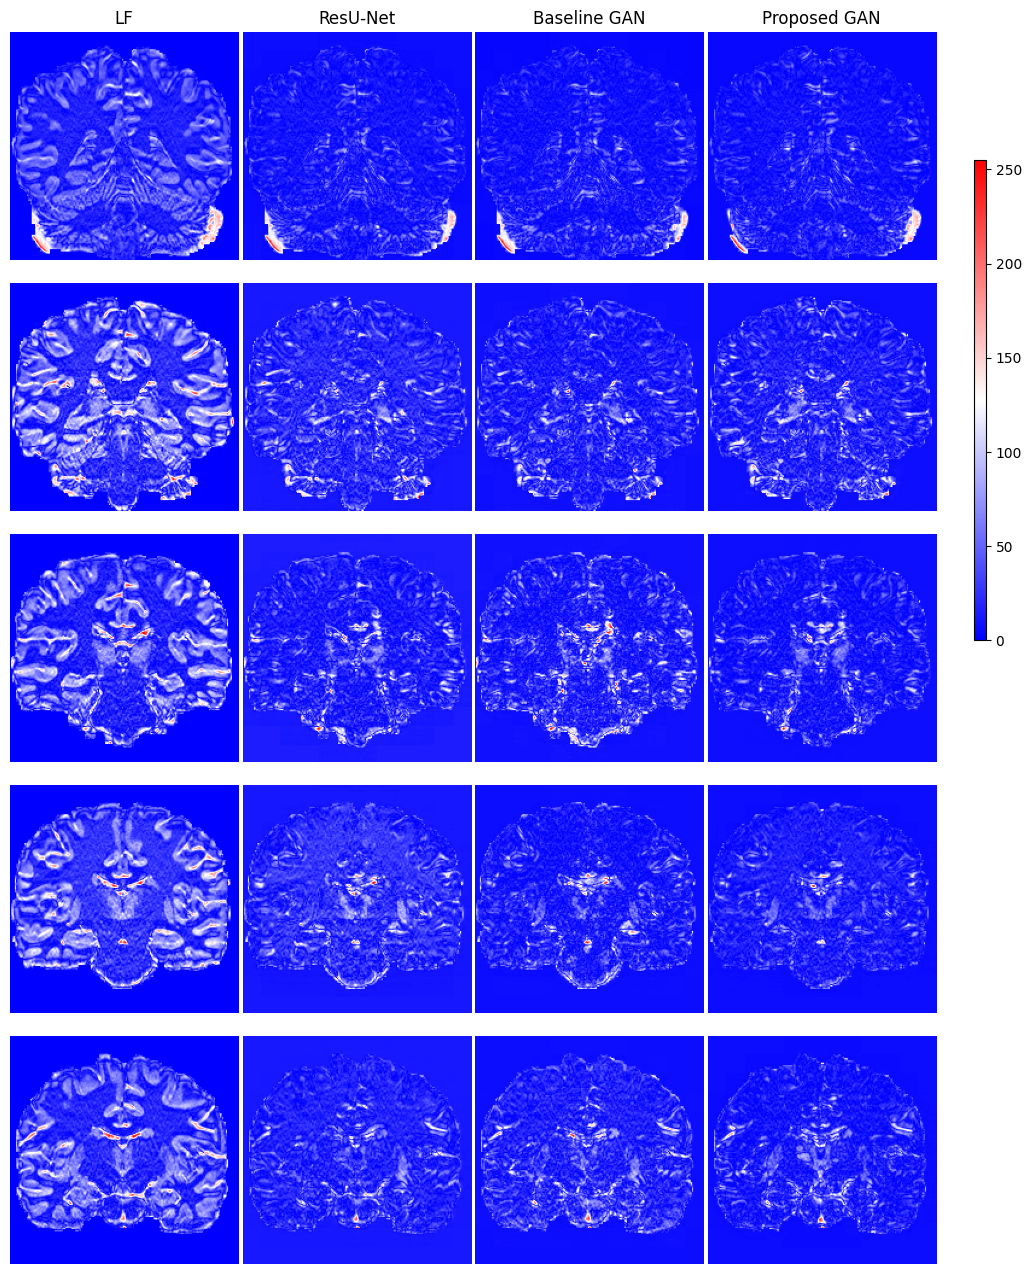

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Define the indices you want to plot
indices = [90, 100, 110, 120, 130]

# Create a subplot grid with 5 rows (one for each index) and 4 columns (one for each model)
#fig should be compact
fig, axes = plt.subplots(len(indices), 4, figsize=(12, 16))  # Adjust figsize as needed

for i, idx in enumerate(indices):
    # Normalize and crop samples for the current index
    # ... (your normalization and cropping code here for lr_sample, hr_sample, and pred_samples)

    # Calculate error maps and normalize
    # ... (your error map calculation code here)

    # Plot error maps for the current index

    lr_sample = torch.tensor(lr[:,idx,:])
    hr_sample = torch.tensor(gt[:,idx,:])
    #diffGAN
    pred_sample = torch.tensor(pred[:,idx,:])
    #baseGAN
    pred2_sample = torch.tensor(pred2[:,idx,:])
    #subVolGAN
    pred3_sample = torch.tensor(pred3[:,idx,:])
    pred4_sample = torch.tensor(pred4[:,idx,:])

    lr_sample = (lr_sample - lr_sample.min())/ (lr_sample.max() - lr_sample.min())
    hr_sample = (hr_sample - hr_sample.min())/ (hr_sample.max() - hr_sample.min())
    pred_sample = (pred_sample - pred_sample.min())/ (pred_sample.max() - pred_sample.min())
    pred2_sample = (pred2_sample - pred2_sample.min())/ (pred2_sample.max() - pred2_sample.min())
    pred3_sample = (pred3_sample - pred3_sample.min())/ (pred3_sample.max() - pred3_sample.min())
    pred4_sample = (pred4_sample - pred4_sample.min())/ (pred4_sample.max() - pred4_sample.min())


    #crop lr_sample
    lr_sample = lr_sample[25:215,10:200]
    hr_sample = hr_sample[25:215,10:200]
    pred_sample = pred_sample[25:215,10:200]
    pred2_sample = pred2_sample[25:215,10:200]
    pred3_sample = pred3_sample[25:215,10:200]
    pred4_sample = pred4_sample[25:215,10:200]

    # Convert PyTorch tensors to numpy arrays
    lr_sample_np = lr_sample.numpy()
    pred_sample_np = pred_sample.numpy()
    pred2_sample_np = pred2_sample.numpy()
    pred3_sample_np = pred3_sample.numpy()
    pred4_sample_np = pred4_sample.numpy()
    hr_sample_np = hr_sample.numpy()

    # Calculate error map
    error_map = np.abs(lr_sample_np - hr_sample_np)
    error_map_normalized = ((error_map - error_map.min()) * (255 / (error_map.max() - error_map.min()))).astype(np.uint8)

    error_map2 = np.abs(pred_sample_np - hr_sample_np)
    error_map2_normalized = ((error_map2 - error_map2.min()) * (255 / (error_map2.max() - error_map2.min()))).astype(np.uint8)

    error_map3 = np.abs(pred2_sample_np - hr_sample_np)
    error_map3_normalized = ((error_map3 - error_map3.min()) * (255 / (error_map3.max() - error_map3.min()))).astype(np.uint8)

    error_map4 = np.abs(pred3_sample_np - hr_sample_np)
    error_map4_normalized = ((error_map4 - error_map4.min()) * (255 / (error_map4.max() - error_map4.min()))).astype(np.uint8)

    error_map5 = np.abs(pred4_sample_np - hr_sample_np)
    error_map5_normalized = ((error_map5 - error_map5.min()) * (255 / (error_map5.max() - error_map5.min()))).astype(np.uint8)
    # LR
    if i == 0:
        axes[i, 0].imshow(np.rot90(error_map_normalized), cmap='bwr', vmin=0, vmax=255)
        axes[i, 0].set_title(f'LF')
        axes[i, 0].axis('off')

        # Model 2
        axes[i, 1].imshow(np.rot90(error_map3_normalized), cmap='bwr', vmin=0, vmax=255)
        axes[i, 1].set_title(f'ResU-Net')
        axes[i, 1].axis('off')
        
        # Model 3
        axes[i, 2].imshow(np.rot90(error_map4_normalized), cmap='bwr', vmin=0, vmax=255)
        axes[i, 2].set_title(f'Baseline GAN')
        axes[i, 2].axis('off')
        
        # Model 4
        axes[i, 3].imshow(np.rot90(error_map5_normalized), cmap='bwr', vmin=0, vmax=255)
        axes[i, 3].set_title(f'Proposed GAN')
        axes[i, 3].axis('off')
        
    else:
        axes[i, 0].imshow(np.rot90(error_map_normalized), cmap='bwr', vmin=0, vmax=255)
        axes[i, 0].axis('off')

        # Model 2
        axes[i, 1].imshow(np.rot90(error_map3_normalized), cmap='bwr', vmin=0, vmax=255)
        axes[i, 1].axis('off')
        
        # Model 3
        axes[i, 2].imshow(np.rot90(error_map4_normalized), cmap='bwr', vmin=0, vmax=255)
        axes[i, 2].axis('off')
        
        # Model 4
        axes[i, 3].imshow(np.rot90(error_map5_normalized), cmap='bwr', vmin=0, vmax=255)
        axes[i, 3].axis('off')


# Adjust layout to prevent overlap
#fig.tight_layout()
fig.subplots_adjust(wspace=0.0, hspace=0.1)

cbar_ax = fig.add_axes([0.93, 0.5, 0.01, 0.3])
fig.colorbar(ax[0].imshow(np.rot90(error_map_normalized), cmap='bwr', vmin=0, vmax=255), cax=cbar_ax)

plt.show()

# save it to pdf
fig.savefig('error_map.pdf', bbox_inches='tight')

In [63]:
print(colors_lr_made.shape)

(180, 190, 3)


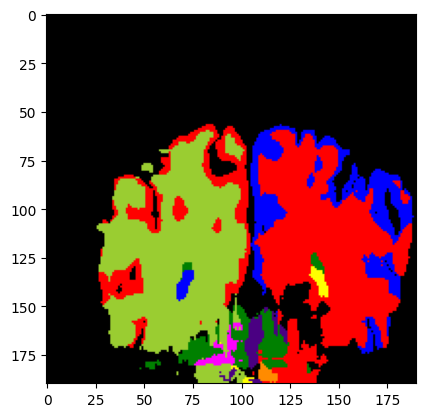

In [43]:
fs_pred_data = nib.load('./3rd_yr/diffusion.py/result/real_results/FastSurfer/Unet/aseg.auto_noCCseg.mgz').get_fdata()
colors_pred = color.label2rgb(fs_pred_data, bg_label=0)
#crop colors
# colors_pred = colors_pred[:,10:]
idx_fs = 80
plt.imshow(np.flipud(np.rot90(colors_lr[:,:,idx_fs+9,:])))
plt.show()


In [ ]:
orig_data = nib.load(img).get_fdata() / 255
pred_data = nib.load('/content/fastsurfer_seg/Tutorial/mri/aparc.DKTatlas+aseg.deep.mgz').get_fdata()

In [6]:
import torch
import torch.nn.functional as F
from torchmetrics import PeakSignalNoiseRatio, MultiScaleStructuralSimilarityIndexMeasure
# from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity

# Assuming sample and hr_sample are your input torch tensors. 
# They should be in the format [batch_size, channels, height, width] and in the range [0, 1].

psnr_1 = []
mssim_1 = []

psnr_2 = []
mssim_2 = []

psnr_3 = []
mssim_3 = []

psnr_4 = []
mssim_4 = []

def compute_psnr(pred, target):
    mse = F.mse_loss(pred, target, reduction='mean')
    psnr = 10 * torch.log10(1 / mse)
    return psnr.item()

def compute_mssim(pred, target):
    mssim_module = MultiScaleStructuralSimilarityIndexMeasure()
    mssim = mssim_module(pred, target)
    return mssim.item()

for idx in range(30, 200, 1):
    lr_sample = torch.tensor(lr[:,idx,:])
    hr_sample = torch.tensor(gt[:,idx,:])
    #diffGAN
    pred_sample = torch.tensor(pred[:,idx,:])
    #baseGAN
    pred2_sample = torch.tensor(pred2[:,idx,:])
    #subVolGAN
    pred3_sample = torch.tensor(pred3[:,idx,:])
    pred4_sample = torch.tensor(pred4[:,idx,:])

    lr_sample = (lr_sample - lr_sample.min())/ (lr_sample.max() - lr_sample.min())
    hr_sample = (hr_sample - hr_sample.min())/ (hr_sample.max() - hr_sample.min())
    pred_sample = (pred_sample - pred_sample.min())/ (pred_sample.max() - pred_sample.min())
    pred2_sample = (pred2_sample - pred2_sample.min())/ (pred2_sample.max() - pred2_sample.min())
    pred3_sample = (pred3_sample - pred3_sample.min())/ (pred3_sample.max() - pred3_sample.min())
    pred4_sample = (pred4_sample - pred4_sample.min())/ (pred4_sample.max() - pred4_sample.min())

    lr_sample = lr_sample[25:215,10:200]
    hr_sample = hr_sample[25:215,10:200]
    pred_sample = pred_sample[25:215,10:200]
    pred2_sample = pred2_sample[25:215,10:200]
    pred3_sample = pred3_sample[25:215,10:200]
    pred4_sample = pred4_sample[25:215,10:200]


    pred_sample = pred_sample.unsqueeze(0).unsqueeze(0)
    pred2_sample = pred2_sample.unsqueeze(0).unsqueeze(0)
    pred3_sample = pred3_sample.unsqueeze(0).unsqueeze(0)
    pred4_sample = pred4_sample.unsqueeze(0).unsqueeze(0)
    hr_sample = hr_sample.unsqueeze(0).unsqueeze(0)
  

    

    psnr_value = compute_psnr(pred_sample, hr_sample)
    mssim_value = compute_mssim(pred_sample, hr_sample) 
    psnr_1.append(psnr_value)
    mssim_1.append(mssim_value)

    psnr_value2 = compute_psnr(pred2_sample, hr_sample)
    mssim_value2 = compute_mssim(pred2_sample, hr_sample)
    psnr_2.append(psnr_value2)
    mssim_2.append(mssim_value2)

    psnr_value3 = compute_psnr(pred3_sample, hr_sample)
    mssim_value3 = compute_mssim(pred3_sample, hr_sample)
    psnr_3.append(psnr_value3)
    mssim_3.append(mssim_value3)


    psnr_value4 = compute_psnr(pred4_sample, hr_sample)
    mssim_value4 = compute_mssim(pred4_sample, hr_sample)
    psnr_4.append(psnr_value4)
    mssim_4.append(mssim_value4)

# print("PSNR: ", np.mean(psnr_1), np.mean(psnr_2), np.mean(psnr_3), np.mean(psnr_4))
# print("MSSIM: ", np.mean(mssim_1), np.mean(mssim_2), np.mean(mssim_3) ,np.mean(mssim_4))

# print("PSNR: ", np.std(psnr_1), np.std(psnr_2), np.std(psnr_3), np.std(psnr_4))
# print("MSSIM: ", np.std(mssim_1), np.std(mssim_2), np.std(mssim_3), np.std(mssim_4))

#final. put "\pm" in between mean and std for each
# print("PSNR: ", np.mean(psnr_1), "\pm", np.std(psnr_1))
# print("PSNR1:", np.mean(psnr_2), "\pm", np.std(psnr_2))
# print("PSNR2:", np.mean(psnr_3), "\pm", np.std(psnr_3))
# print("PSNR3:", np.mean(psnr_4), "\pm", np.std(psnr_4))

# print("MSSIM: ", np.mean(mssim_1), "\pm", np.std(mssim_1))
# print("MSSIM1:", np.mean(mssim_2), "\pm", np.std(mssim_2))
# print("MSSIM2:", np.mean(mssim_3), "\pm", np.std(mssim_3))
# print("MSSIM3:", np.mean(mssim_4), "\pm", np.std(mssim_4))
    
#print mean and std until 3 significant figures
print("PSNR: ", "{:.3f}".format(np.mean(psnr_1)), "\pm", "{:.3f}".format(np.std(psnr_1)))
print("PSNR1:", "{:.3f}".format(np.mean(psnr_2)), "\pm", "{:.3f}".format(np.std(psnr_2)))
print("PSNR2:", "{:.3f}".format(np.mean(psnr_3)), "\pm", "{:.3f}".format(np.std(psnr_3)))
print("PSNR3:", "{:.3f}".format(np.mean(psnr_4)), "\pm", "{:.3f}".format(np.std(psnr_4)))

print("MSSIM: ", "{:.3f}".format(np.mean(mssim_1)), "\pm", "{:.3f}".format(np.std(mssim_1)))
print("MSSIM1:", "{:.3f}".format(np.mean(mssim_2)), "\pm", "{:.3f}".format(np.std(mssim_2)))
print("MSSIM2:", "{:.3f}".format(np.mean(mssim_3)), "\pm", "{:.3f}".format(np.std(mssim_3)))
print("MSSIM3:", "{:.3f}".format(np.mean(mssim_4)), "\pm", "{:.3f}".format(np.std(mssim_4)))








PSNR:  23.695 \pm 2.235
PSNR1: 24.318 \pm 2.468
PSNR2: 24.908 \pm 2.736
PSNR3: 25.159 \pm 2.813
MSSIM:  0.948 \pm 0.020
MSSIM1: 0.949 \pm 0.019
MSSIM2: 0.949 \pm 0.020
MSSIM3: 0.952 \pm 0.018


In [145]:
import torch
import torch.nn.functional as F
from torchmetrics import PeakSignalNoiseRatio, MultiScaleStructuralSimilarityIndexMeasure
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
L= LearnedPerceptualImagePatchSimilarity(net_type='vgg', normalize=True).to(device)

/Users/youngwoojung/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/youngwoojung/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [146]:
import torch
import torch.nn.functional as F
# from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity

# Assuming sample and hr_sample are your input torch tensors. 
# They should be in the format [batch_size, channels, height, width] and in the range [0, 1].

lpips = []
lpips1 = []
lpips2 = []
lpips3 = []

def percep_loss(sr_slice, hr_slice, device, lpips_loss):
    # Initialize LPIPS loss function
    #crop
    sr_slice = sr_slice[25:215,10:200]
    hr_slice = hr_slice[25:215,10:200]

    # Reshape inputs to [N, C, H, W]. Assuming inputs are [H, W], add batch and channel dimensions
    sr_slice = sr_slice.unsqueeze(0).unsqueeze(0)  # Now [1, 1, H, W]
    hr_slice = hr_slice.unsqueeze(0).unsqueeze(0)  # Now [1, 1, H, W]

    # Repeat the channel dimension to simulate an RGB image, if necessary
    sr_slice = sr_slice.repeat(1, 3, 1, 1)  # Now [1, 3, H, W]
    hr_slice = hr_slice.repeat(1, 3, 1, 1)  # Now [1, 3, H, W]

    # # Normalize images from [0, 1] to [-1, 1] if not already done
    # sr_slice = torch.clamp(sr_slice * 2 - 1, min=-1.0, max=1.0)
    # hr_slice = torch.clamp(hr_slice * 2 - 1, min=-1.0, max=1.0)

    loss_lpips = lpips_loss(sr_slice, hr_slice)

    return loss_lpips

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for idx in range(50, 180, 1):
    lr_sample = torch.tensor(lr[:,idx,:])
    hr_sample = torch.tensor(gt[:,idx,:])
    #diffGAN
    pred_sample = torch.tensor(pred[:,idx,:])
    #baseGAN
    pred2_sample = torch.tensor(pred2[:,idx,:])
    #subVolGAN
    pred3_sample = torch.tensor(pred3[:,idx,:])
    pred4_sample = torch.tensor(pred4[:,idx,:])

    lr_sample = (lr_sample - lr_sample.min())/ (lr_sample.max() - lr_sample.min())
    hr_sample = (hr_sample - hr_sample.min())/ (hr_sample.max() - hr_sample.min())
    pred_sample = (pred_sample - pred_sample.min())/ (pred_sample.max() - pred_sample.min())
    pred2_sample = (pred2_sample - pred2_sample.min())/ (pred2_sample.max() - pred2_sample.min())
    pred3_sample = (pred3_sample - pred3_sample.min())/ (pred3_sample.max() - pred3_sample.min())
    pred4_sample = (pred4_sample - pred4_sample.min())/ (pred4_sample.max() - pred4_sample.min())


    lpips_loss = percep_loss(pred_sample.float().to(device), hr_sample.float().to(device), device, L)
    lpips_loss1 = percep_loss(pred2_sample.float().to(device), hr_sample.float().to(device), device, L)
    lpips_loss2 = percep_loss(pred3_sample.float().to(device), hr_sample.float().to(device), device, L)
    lpips_loss3 = percep_loss(pred4_sample.float().to(device), hr_sample.float().to(device), device, L)

        # Correctly detach and convert tensors to numpy before appending
    lpips.append(lpips_loss.detach().cpu().numpy())
    lpips1.append(lpips_loss1.detach().cpu().numpy())
    lpips2.append(lpips_loss2.detach().cpu().numpy())
    lpips3.append(lpips_loss3.detach().cpu().numpy())



# print("PSNR: ", np.mean(psnr_1), "\pm", np.std(psnr_1))
# print("PSNR1:", np.mean(psnr_2), "\pm", np.std(psnr_2))
# print("PSNR2:", np.mean(psnr_3), "\pm", np.std(psnr_3))
# print("PSNR3:", np.mean(psnr_4), "\pm", np.std(psnr_4))

# print("MSSIM: ", np.mean(mssim_1), "\pm", np.std(mssim_1))
# print("MSSIM1:", np.mean(mssim_2), "\pm", np.std(mssim_2))
# print("MSSIM2:", np.mean(mssim_3), "\pm", np.std(mssim_3))
# print("MSSIM3:", np.mean(mssim_4), "\pm", np.std(mssim_4))
print("LPIPS: ", np.mean(lpips), "\pm", np.std(lpips))
print("LPIPS1:", np.mean(lpips1), "\pm", np.std(lpips1))
print("LPIPS2:", np.mean(lpips2), "\pm", np.std(lpips2))
print("LPIPS3:", np.mean(lpips3), "\pm", np.std(lpips3))







KeyboardInterrupt: 

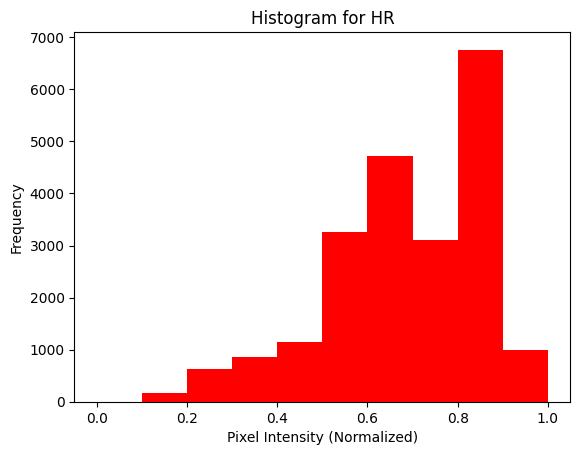

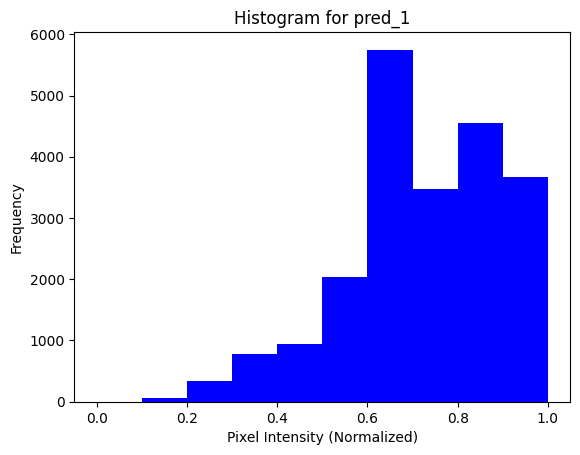

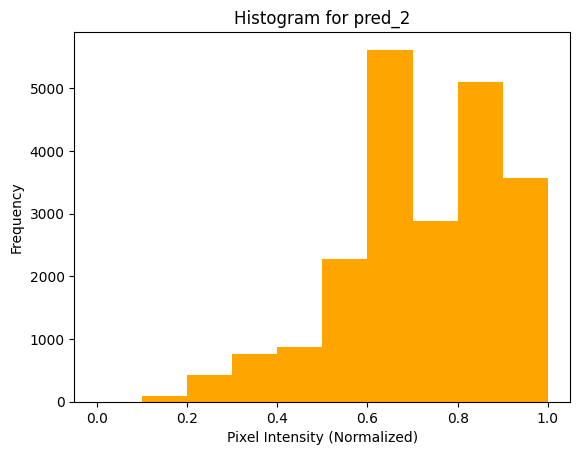

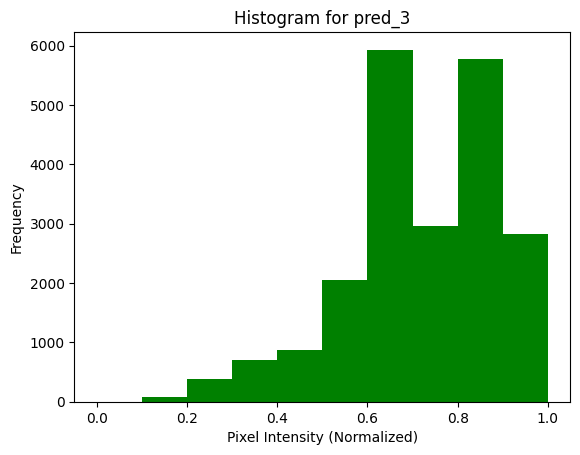

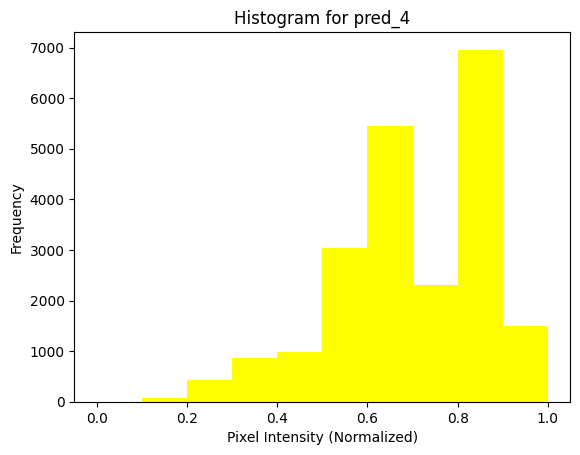

In [150]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram(image_array, title, color):
    # Flatten the image array to 1D for histogram
    pixels = image_array.flatten()
    #exclude 0
    threshold = 1e-1  # or another small number that suits your data
    pixels = pixels[pixels > threshold]

    # Plot histogram
    plt.hist(pixels, bins=10, range=(0,1), alpha=1, color=color)
    plt.title('Histogram for ' + title)
    plt.xlabel('Pixel Intensity (Normalized)')
    plt.ylabel('Frequency')
    plt.show()

# Example usage with dummy data
# Replace these with your actual numpy arrays
# image1 = np.random.rand(256, 256)  # Dummy data for the first image
# image2 = np.random.rand(256, 256)  # Dummy data for the second image

plot_histogram(hr_sample, 'HR', 'red')
plot_histogram(pred_sample, 'pred_1', 'blue')
plot_histogram(pred2_sample, 'pred_2', 'orange')
plot_histogram(pred3_sample, 'pred_3', 'green')
plot_histogram(pred4_sample, 'pred_4', 'yellow')




In [155]:
import numpy as np

def calculate_histogram(image_array, bins=10):
    # Flatten the image array to 1D, exclude zeros, and calculate the histogram
    pixels = image_array.flatten()
    pixels = pixels[pixels > 0]
    hist_values, _ = np.histogram(pixels, bins=bins, range=(0,1))
    return hist_values

def hist_intersection(h1, h2):
    # Ensure that h1 and h2 are numpy arrays
    h1 = np.array(h1)
    h2 = np.array(h2)
    # Calculate the intersection
    return np.sum(np.minimum(h1, h2))

lr_hist_ls = []
pred_hist_ls = []
pred2_hist_ls = []
pred3_hist_ls = []
pred4_hist_ls = []


# from idx 80 to 130, calculate histogram similarity between HR and prediction
for idx in range(80,131):

    lr_sample = torch.tensor(lr[:,idx,:])
    hr_sample = torch.tensor(gt[:,idx,:])
    #diffGAN
    pred_sample = torch.tensor(pred[:,idx,:])
    #baseGAN
    pred2_sample = torch.tensor(pred2[:,idx,:])
    #subVolGAN
    pred3_sample = torch.tensor(pred3[:,idx,:])
    pred4_sample = torch.tensor(pred4[:,idx,:])

    lr_sample = (lr_sample - lr_sample.min())/ (lr_sample.max() - lr_sample.min())
    hr_sample = (hr_sample - hr_sample.min())/ (hr_sample.max() - hr_sample.min())
    pred_sample = (pred_sample - pred_sample.min())/ (pred_sample.max() - pred_sample.min())
    pred2_sample = (pred2_sample - pred2_sample.min())/ (pred2_sample.max() - pred2_sample.min())
    pred3_sample = (pred3_sample - pred3_sample.min())/ (pred3_sample.max() - pred3_sample.min())
    pred4_sample = (pred4_sample - pred4_sample.min())/ (pred4_sample.max() - pred4_sample.min())


    #crop lr_sample
    lr_sample = lr_sample[25:215,10:200]
    hr_sample = hr_sample[25:215,10:200]
    pred_sample = pred_sample[25:215,10:200]
    pred2_sample = pred2_sample[25:215,10:200]
    pred3_sample = pred3_sample[25:215,10:200]
    pred4_sample = pred4_sample[25:215,10:200]



    # Example usage with dummy data
    # Replace these with your actual numpy arrays
    hr_hist = calculate_histogram(hr_sample)
    lr_hist = calculate_histogram(lr_sample)
    pred_hist = calculate_histogram(pred_sample)
    pred2_hist = calculate_histogram(pred2_sample)
    pred3_hist = calculate_histogram(pred3_sample)
    pred4_hist = calculate_histogram(pred4_sample)

    # # Calculate intersections
    # print(hist_intersection(hr_hist, lr_hist))
    # print(hist_intersection(hr_hist, pred_hist))
    # print(hist_intersection(hr_hist, pred2_hist))
    # print(hist_intersection(hr_hist, pred3_hist))
    # print(hist_intersection(hr_hist, pred4_hist))

    # # similiarity in percentage
    print(hist_intersection(hr_hist, lr_hist)/np.sum(hr_hist)*100)
    print(hist_intersection(hr_hist, pred_hist)/np.sum(hr_hist)*100)
    print(hist_intersection(hr_hist, pred2_hist)/np.sum(hr_hist)*100)
    print(hist_intersection(hr_hist, pred3_hist)/np.sum(hr_hist)*100)
    print(hist_intersection(hr_hist, pred4_hist)/np.sum(hr_hist)*100)

    # lr_hist_ls.append(hist_intersection(hr_hist, lr_hist)/np.sum(hr_hist)*100)
    # pred_hist_ls.append(hist_intersection(hr_hist, pred_hist)/np.sum(hr_hist)*100)
    # pred2_hist_ls.append(hist_intersection(hr_hist, pred2_hist)/np.sum(hr_hist)*100)
    # pred3_hist_ls.append(hist_intersection(hr_hist, pred3_hist)/np.sum(hr_hist)*100)
    # pred4_hist_ls.append(hist_intersection(hr_hist, pred4_hist)/np.sum(hr_hist)*100)

# print("Histogram Similarity: ", np.mean(lr_hist), "\pm", np.std(lr_hist))
# print("Histogram Similarity1:", np.mean(pred_hist), "\pm", np.std(pred_hist))
# print("Histogram Similarity2:", np.mean(pred2_hist), "\pm", np.std(pred2_hist))
# print("Histogram Similarity3:", np.mean(pred3_hist), "\pm", np.std(pred3_hist))
# print("Histogram Similarity4:", np.mean(pred4_hist), "\pm", np.std(pred4_hist))


67.22226529188309
84.21583068454919
88.54562369175905
93.72431971470657
89.24722846732305
67.82429863024329
85.17325676147608
88.785844553956
93.4616429319778
90.32633580381048
69.723991507431
86.0644663192434
86.29222157884578
90.70449720131248
90.98243582320016
71.2664322837053
86.89238764903699
86.8962091103638
95.81167838581473
90.63359828798532
70.59516570386135
86.10899969595623
91.44496807540285
93.99513529948312
91.53238066281546
69.68589377498571
84.33276223110605
86.98267656577194
90.25699600228441
90.93089663049686
70.8113843938303
86.77757986887482
85.89077955053625
94.47076211770948
90.83639671050139
70.97589497906371
81.72696065487193
84.75989286657362
86.44611264098985
87.69097287713606
69.86275401880498
74.52987564452532
83.28404610251744
84.63754928723081
80.398847437064
72.27568369403978
79.43783043627096
89.7379331330113
90.70023962572743
87.67639116047317
71.57727393164011
80.35504750369053
86.30531057193687
87.39922025814755
87.40300541277111
70.49068086724989
80.6

diffgan 0.1357975150148073
basegan 0.139680162568887


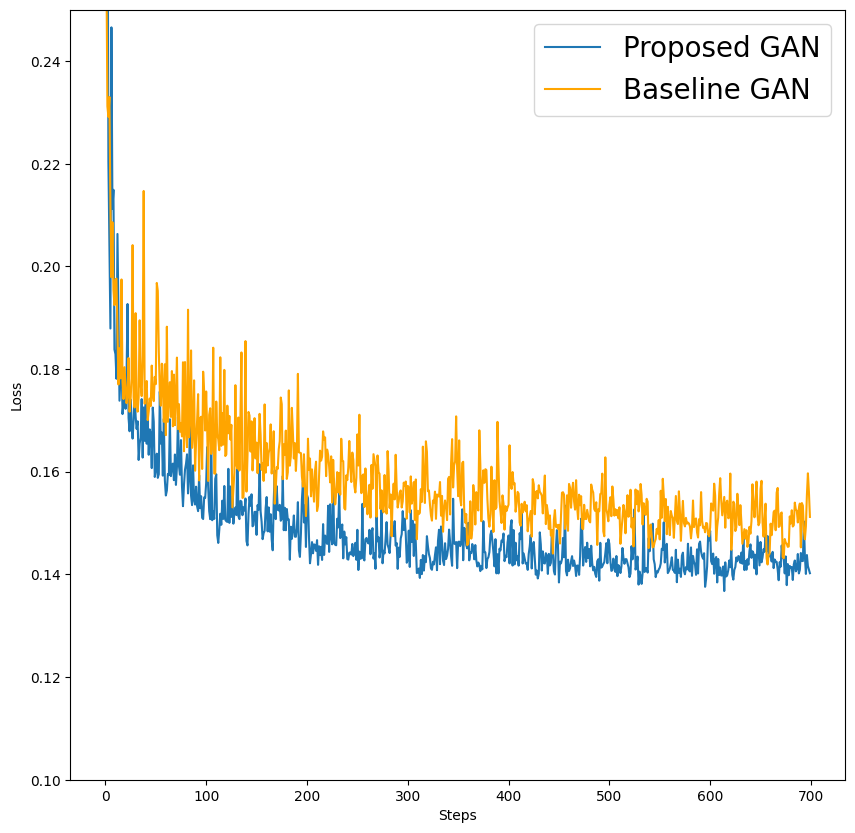

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# The data seems to be straightforward with a single 'train_loss' column in each.
# We can plot this data directly to compare the training stability of both models.

# Plotting the training loss from both CSV files
plt.figure(figsize=(10, 10))
name = 'valid_loss'
x_max = 1000 if name == 'train_loss' else 700
baseGan_path = "./baseGAN_ds10_val_loss.csv"
# baseGan1_path = "./baseGAN_val_loss.csv"
diffGan_path = "./diffGan_ds10_val_loss.csv"
#diffGan1_path = "./diffGan_val_loss.csv"

#read disffGan csv
diffGan_df = pd.read_csv(diffGan_path)
print("diffgan", min(diffGan_df[name]))

# diffGan1_df = pd.read_csv(diffGan1_path)
# print("diffgan1", min(diffGan1_df['valid_loss']))

#read baseGan csv
baseGan_df = pd.read_csv(baseGan_path)
print("basegan", min(baseGan_df[name]))

# baseGan1_df = pd.read_csv(baseGan1_path)
# print("basegan1", min(baseGan1_df['valid_loss']))

# Plot diffGan training loss
#
plt.plot(diffGan_df[name].head(x_max), label='Proposed GAN')

# Plot baseGan training loss
# color orange

plt.plot(baseGan_df[name].head(x_max), label='Baseline GAN', color='orange')
#plt.plot(diffGan1_df['valid_loss'].head(1000), label='baseGan 36 valid Loss')

# Adding title and labels
plt.xlabel('Steps')
plt.ylabel('Loss')

if name == 'train_loss':
    plt.ylim(0.05, 0.3)
else:
    plt.ylim(0.1, 0.25)


# Adding a legend to differentiate the two lines
plt.legend(fontsize='20')

# Show the plot
plt.show()